In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
from PIL import Image
from skimage.color import rgb2grey, rgb2hed
from skimage.exposure import rescale_intensity
from sklearn.externals import joblib

from utils import plot_list

In [2]:
meta = pd.read_csv('/mnt/ml-team/dsb_2018/kuba/stage1_metadata.csv')
meta_train = meta[meta['is_train']==1]

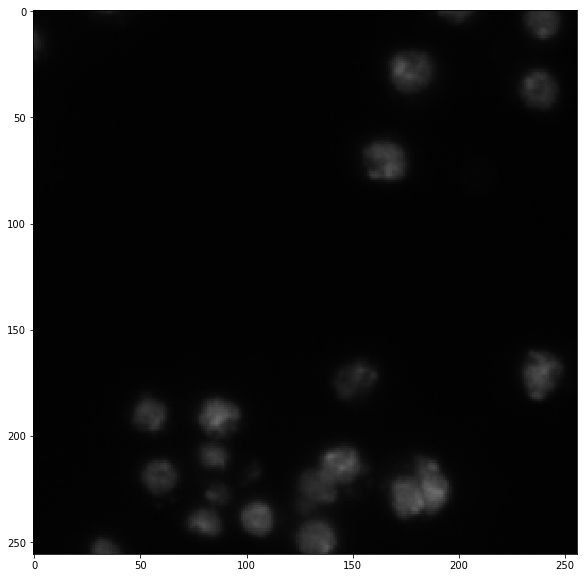

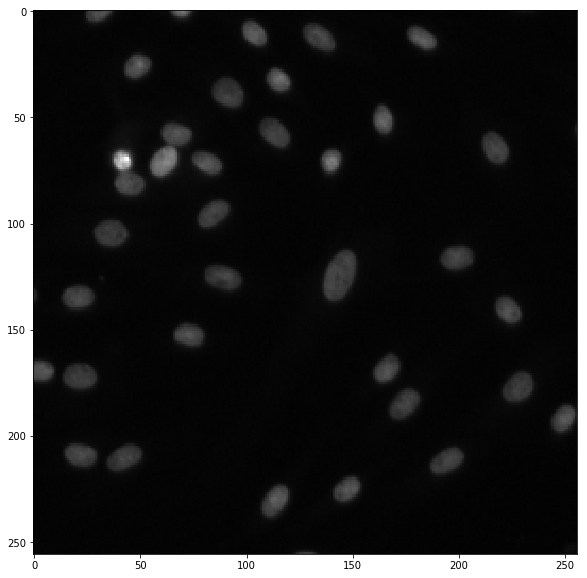

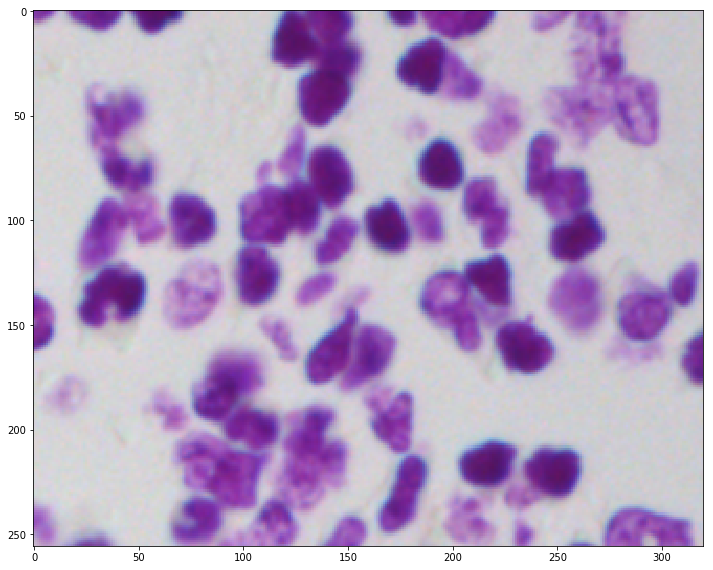

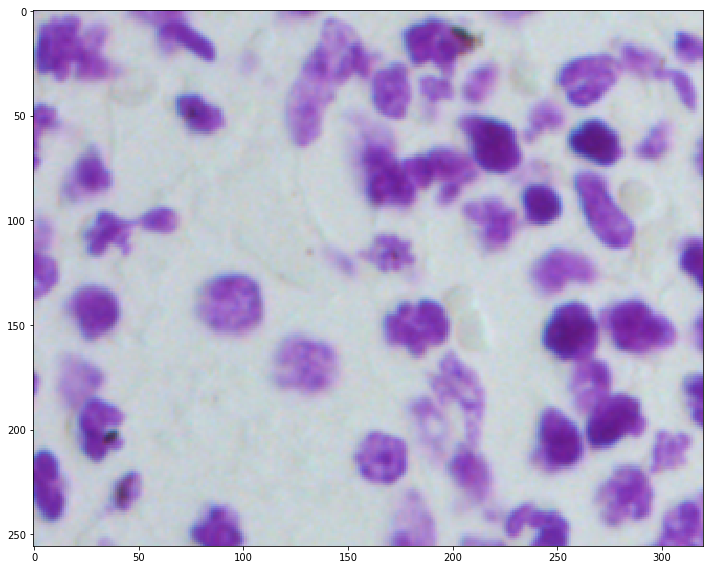

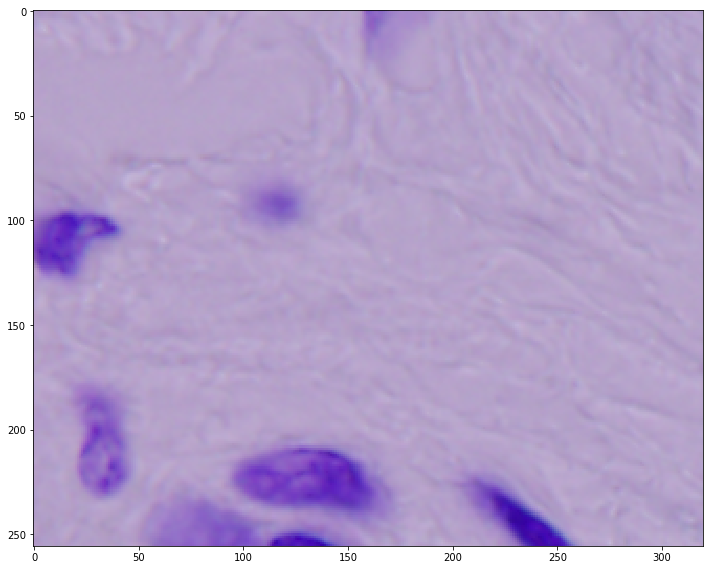

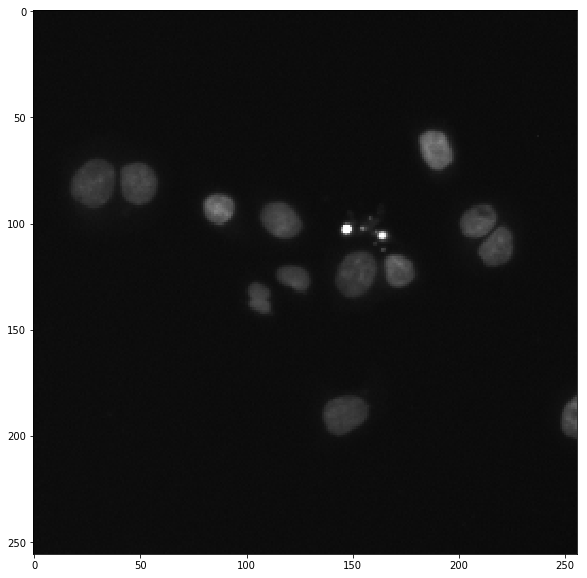

In [4]:
for i, filepath in enumerate(meta['file_path_image'].tolist()):
    img = np.array(Image.open(filepath,'r'))
    plot_list(images=[img])
    if i == 5: break

# Stained/not stained filter
Let's first build a filter that distinguishes the hematoxyli/eosin stained images from the rest

In [32]:
def is_stained(img):
    red_mean, green_mean, blue_mean = img.mean(axis=(0,1))
    if red_mean == green_mean == blue_mean:
        return False
    else:
        return True
    
def extract_hematoxylin_eosin(img):
    h,w = img.shape[:2]
    img_hed = rgb2hed(img)
    img_he_sum = np.zeros((h,w,2))
    img_he_sum[:,:,0] = rescale_intensity(img_hed[:,:,0], out_range=(0,1))
    img_he_sum[:,:,1] = rescale_intensity(img_hed[:,:,1], out_range=(0,1))
    img_he_sum = rescale_intensity(img_he_sum.sum(axis=2), out_range=(0,1))
    return img_he_sum

greyscaled_images, destained_images = [], []
for i, filepath in enumerate(meta['file_path_image'].tolist()):
    img = np.array(Image.open(filepath,'r'))[:,:,:3]
    if is_stained(img):
        img = (extract_hematoxylin_eosin(img)*255).astype(np.uint8)
        destained_images.append(img)
    else:
        img = (rgb2grey(img)*255).astype(np.uint8)
        greyscaled_images.append(img)        
    if i ==100: break

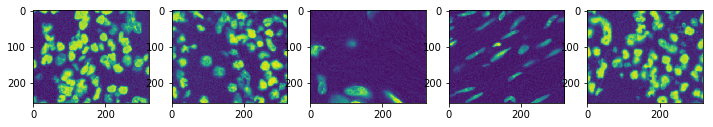

In [33]:
plot_list(images=destained_images[:5])

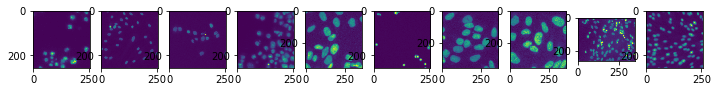

In [34]:
plot_list(images=greyscaled_images[:10])